In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.describe

<bound method NDFrame.describe of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [4]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 520.0 bytes


Text(0, 0.5, 'Salary')

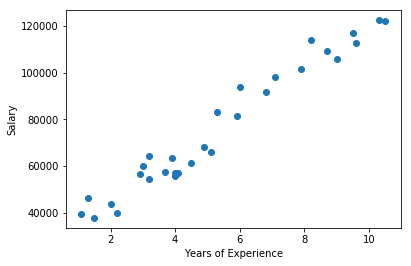

In [6]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [7]:
X=df.drop(['Salary'],axis=1)
y=df['Salary']

In [8]:
X
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train,X_test,y_train,y_test


(    YearsExperience
 28             10.3
 10              3.9
 3               2.0
 1               1.3
 19              6.0
 22              7.9
 12              4.0
 5               2.9
 14              4.5
 0               1.1
 21              7.1
 4               2.2
 8               3.2
 13              4.1
 9               3.7
 15              4.9
 29             10.5
 23              8.2
 6               3.0
 17              5.3
 11              4.0,     YearsExperience
 20              6.8
 24              8.7
 7               3.2
 18              5.9
 2               1.5
 27              9.6
 26              9.5
 16              5.1
 25              9.0, 28    122391.0
 10     63218.0
 3      43525.0
 1      46205.0
 19     93940.0
 22    101302.0
 12     56957.0
 5      56642.0
 14     61111.0
 0      39343.0
 21     98273.0
 4      39891.0
 8      64445.0
 13     57081.0
 9      57189.0
 15     67938.0
 29    121872.0
 23    113812.0
 6      60150.0
 17     83088.0
 11     

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()



In [12]:
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
lr.intercept_

25975.814659541145

In [14]:
lr.coef_

array([9577.17174975])

In [15]:
from sklearn import metrics

In [16]:
y_pred=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

In [17]:
len(y_pred)

9

In [18]:
len(y_test)

9

In [19]:
metrics.r2_score(y_test,y_pred)

0.9746363787521536

In [20]:
metrics.r2_score(y_train,y_pred_train)

0.9430010023853349

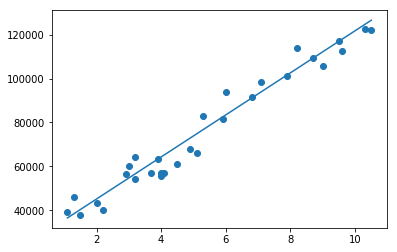

In [21]:
plt.scatter(df.YearsExperience,df.Salary)
plt.plot(df.YearsExperience,9577.17174975*df.YearsExperience +25975.814659541145)
plt.show()

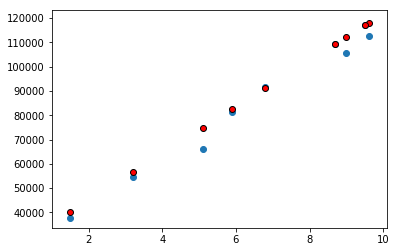

In [22]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred,color='red',edgecolors="black")

In [23]:
import statsmodels.api as sm

In [24]:
X_train_sm=sm.add_constant(X_train)
lr1=sm.OLS(y_train,X_train_sm).fit()

In [25]:
lr1

In [26]:
X_train_sm

,const,YearsExperience
28,1.0,10.3
10,1.0,3.9
3,1.0,2.0
1,1.0,1.3
19,1.0,6.0
22,1.0,7.9
12,1.0,4.0
5,1.0,2.9
14,1.0,4.5
0,1.0,1.1


In [27]:
lr1.params

const              25975.81466
YearsExperience     9577.17175
dtype: float64

In [28]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     314.3
Date:                Wed, 25 Sep 2019   Prob (F-statistic):           2.81e-13
Time:                        15:16:30   Log-Likelihood:                -213.11
No. Observations:                  21   AIC:                             430.2
Df Residuals:                      19   BIC:                             432.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.598e+04   2939.485     

C:\Users\rockstar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


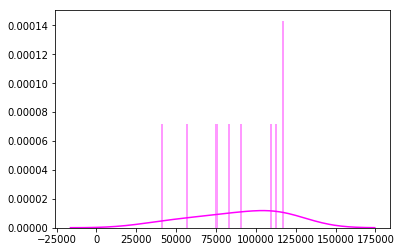

In [29]:
sns.distplot(y_pred,bins=50,color='magenta')